In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
compute_distance <- function(x, center){
    dist <- sum((x - center)^2)
    dist
}

In [3]:
argmin <- function(x){
    ind <- which.min(x)
    ind
}

In [4]:

kmeans <- function(x, k, n_init=10, max_iter=100){  
    
    # initialize inertia to infinity
    inertia <- 1/0    
    count <- 0
    
    while (count <= n_init){
         # initialize k centers
        centers <- sample_n(x, k)

        # Get distance from samples to all centers
        n_rows <- dim(x)[1]
        n_cols <- k
        distances <- data.frame(matrix(nrow=n_rows, ncol=n_cols))

        # Iterate over max_iter
        for (i in seq(max_iter)){
            # Compute distance matrix with current centers
            for (c in seq(k)){
                col <- names(distances)[c]
                center <- centers[c, ]
                distances[col] <- apply(x, 1, FUN = compute_distance, center = center)

            }

            labels <- apply(distances, 1, argmin)

            # Move the centers to mean of the clusters
            prev_centers <- centers
            for (c in seq(k)){
                centers[c, ] <- apply(x[labels==c,], 2, mean)

            }
            # Update the inertia
            updated_inertia <- sum(apply(distances, 1, min))

            # Check if the centers are moving
            diff_centers <- abs(sum(prev_centers - centers))

            if (diff_centers < 1e-6){
#                 print(paste("Converged in", i, "iterations"))
                break
            }

        }   
        count <- count + 1 
        
    }      
  
    # Check if current initialization is better
    if (updated_inertia < inertia){
        inertia = updated_inertia
        centers_final = centers
        labels_final = labels        
    }   
   
    # Return labels and centers
    list("labels" = labels_final, "centers" = centers_final)
}

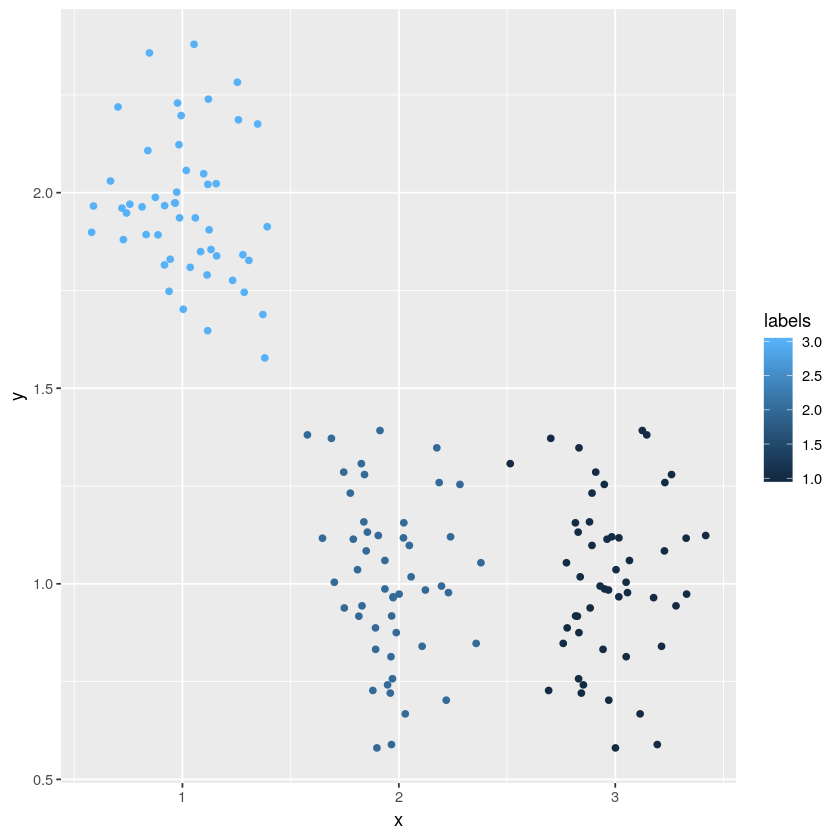

In [5]:
x1 <- rnorm(50, 1, 0.2)
x2 <- rnorm(50, 2, 0.2)
x3 <- rnorm(50, 3, 0.2)
x <- c(x1, x2, x3)
y <- c(x2, x1, x1)

df <- data.frame(x, y)
results <- kmeans(df, 3, n_init=2, max_iter=10)

df_results <- df
df_results$labels <- results$labels

ggplot(df_results, aes(x=x, y=y, color=labels)) +
    geom_point()